In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [155]:
def fixed_table(location):
    raw_data = pd.read_excel(location, sheet_name='Current - ii01', skiprows=4)
    
    # Kelompok Bank
    main_table_bank = pd.DataFrame(columns=['Aktiva Rupiah', 'Valuta Asing', 'Jumlah Aset'])

    # Kelompok Dati II (Rp dan Valas)
    main_table_dati = pd.DataFrame(columns=['Jumlah Aset'])

    for i in range(5, len(raw_data.columns)):
        ext_table_bank = pd.DataFrame({
            'Aktiva Rupiah': raw_data.iloc[3:7, i].values,
            'Valuta Asing': raw_data.iloc[9:13, i].values,
            'Jumlah Aset': raw_data.iloc[15:19, i].values
        })
        main_table_bank = pd.concat([main_table_bank, ext_table_bank], ignore_index=True)

        ext_table_dati = pd.DataFrame({
            'Jumlah Aset': raw_data.iloc[21:60, i].values
        })
        main_table_dati = pd.concat([main_table_dati, ext_table_dati], ignore_index=True)
    
    # Tanggal Kelompok Bank
    tanggal_bank = []
    start_date_bank = datetime(2023, 1, 1)
    for bulan_bank in range(13):
        tahun_bulan = start_date_bank.strftime('%Y-%m')
        tanggal_bank.extend([tahun_bulan] * 4)
        start_date_bank = (start_date_bank.replace(day=1) + timedelta(days=32)).replace(day=1)

    # Tanggal Kelompok Dati II
    tanggal_dati = []
    start_date_dati = datetime(2023, 1, 1)
    for bulan_dati in range(13):
        tahun_bulan = start_date_dati.strftime('%Y-%m')
        tanggal_dati.extend([tahun_bulan] * 39)
        start_date_dati = (start_date_dati.replace(day=1) + timedelta(days=32)).replace(day=1)
    
    # Tipe Komponen Kelompok Bank
    tipe_komponen_bank = ['Bank Pemerintah', 'Bank Swasta Nasional', 'Bank Asing dan Bank Campuran', 'Bank Perkreditan Rakyat']
    tipe_komponen_bank = 13 * tipe_komponen_bank

    # Tipe Komponen Kelompok Dati II
    tipe_komponen_dati = [vals for vals in raw_data.iloc[21:60, 2].values]
    tipe_komponen_dati = 13 * tipe_komponen_dati

    main_table_bank['Tanggal'] = tanggal_bank
    main_table_bank['Tipe Komponen'] = tipe_komponen_bank

    main_table_dati['Tanggal'] = tanggal_dati
    main_table_dati['Tipe Komponen'] = tipe_komponen_dati

    columns_bank = ['Tanggal', 'Tipe Komponen', 'Aktiva Rupiah', 'Valuta Asing', 'Jumlah Aset']
    main_table_bank = main_table_bank[columns_bank]

    columns_dati = ['Tanggal', 'Tipe Komponen', 'Jumlah Aset']
    main_table_dati = main_table_dati[columns_dati]

    # Export DataFrames
    with pd.ExcelWriter('Fixed Dataset.xlsx') as writer:
        main_table_bank.to_excel(writer, sheet_name='Kelompok Bank', index=False)
        main_table_dati.to_excel(writer, sheet_name='Kelompok Dati II', index=False)

    return f"Data has been exported to 'Kelompok Bank.xlsx' and 'Kelompok Dati II.xlsx"

In [156]:
fixed_table('./dataset/dataset.xlsx')

"Data has been exported to 'Kelompok Bank.xlsx' and 'Kelompok Dati II.xlsx"

# Cek Konsistensi Data

In [14]:
data_bank = pd.read_excel('./dataset/Fixed Dataset.xlsx', sheet_name='Kelompok Bank')

In [15]:
data_bank

,Tanggal,Tipe Komponen,Aktiva Rupiah,Valuta Asing,Jumlah Aset
0,2023-01,Bank Pemerintah,-,-,-
1,2023-01,Bank Swasta Nasional,-,-,-
2,2023-01,Bank Asing dan Bank Campuran,-,-,-
3,2023-01,Bank Perkreditan Rakyat,-,-,-
4,2023-02,Bank Pemerintah,31758241.074993,5102408.54521,36860649.620203
5,2023-02,Bank Swasta Nasional,2188718.890336,28326.759478,2217045.649814
6,2023-02,Bank Asing dan Bank Campuran,0,0,0
7,2023-02,Bank Perkreditan Rakyat,42956,-,42956
8,2023-03,Bank Pemerintah,13519088.454692,2464703.214567,15983791.669259
9,2023-03,Bank Swasta Nasional,1134558.791437,8987.888328,1143546.679765


In [16]:
def fixed_datatype(data):
    data['Tanggal'] = pd.to_datetime(data['Tanggal']).dt.strftime('%Y-%m')
    idx = data['Aktiva Rupiah'][(data['Aktiva Rupiah'].str.contains('-') == True) | (data['Aktiva Rupiah'] == 0)].index
    data.loc[idx, ['Aktiva Rupiah', 'Valuta Asing', 'Jumlah Aset']] = None
    data['Valuta Asing'][data['Valuta Asing'].str.contains('-') == True] = None
    data['Jumlah Aset'][data['Jumlah Aset'].str.contains('-') == True] = None
    data[['Aktiva Rupiah', 'Valuta Asing', 'Jumlah Aset']] = data[['Aktiva Rupiah', 'Valuta Asing', 'Jumlah Aset']].astype(float).round(0)
    return data

In [17]:
fixed_datatype(data_bank)

,Tanggal,Tipe Komponen,Aktiva Rupiah,Valuta Asing,Jumlah Aset
0,2023-01,Bank Pemerintah,NaN,NaN,NaN
1,2023-01,Bank Swasta Nasional,NaN,NaN,NaN
2,2023-01,Bank Asing dan Bank Campuran,NaN,NaN,NaN
3,2023-01,Bank Perkreditan Rakyat,NaN,NaN,NaN
4,2023-02,Bank Pemerintah,31758241.0,5102409.0,36860650.0
5,2023-02,Bank Swasta Nasional,2188719.0,28327.0,2217046.0
6,2023-02,Bank Asing dan Bank Campuran,NaN,NaN,NaN
7,2023-02,Bank Perkreditan Rakyat,42956.0,NaN,42956.0
8,2023-03,Bank Pemerintah,13519088.0,2464703.0,15983792.0
9,2023-03,Bank Swasta Nasional,1134559.0,8988.0,1143547.0


In [18]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tanggal        52 non-null     object 
 1   Tipe Komponen  52 non-null     object 
 2   Aktiva Rupiah  21 non-null     float64
 3   Valuta Asing   16 non-null     float64
 4   Jumlah Aset    17 non-null     float64
dtypes: float64(3), object(2)
memory usage: 2.2+ KB


In [32]:
data_bank.isnull().sum()

Tanggal           0
Tipe Komponen     0
Aktiva Rupiah    31
Valuta Asing     36
Jumlah Aset      35
dtype: int64

In [20]:
data_bank.describe().round(2)

,Aktiva Rupiah,Valuta Asing,Jumlah Aset
count,21.00,16.00,17.00
mean,6572472.19,1405841.38,9442080.82
std,8431665.76,1568320.67,10238862.42
min,1.00,8988.00,42956.00
25%,1134559.00,18565.50,1199002.00
50%,1324795.00,1230438.50,2217046.00
75%,13646466.00,2451423.50,16107306.00
max,31758241.00,5102409.00,36860650.00


In [21]:
data_bank

,Tanggal,Tipe Komponen,Aktiva Rupiah,Valuta Asing,Jumlah Aset
0,2023-01,Bank Pemerintah,NaN,NaN,NaN
1,2023-01,Bank Swasta Nasional,NaN,NaN,NaN
2,2023-01,Bank Asing dan Bank Campuran,NaN,NaN,NaN
3,2023-01,Bank Perkreditan Rakyat,NaN,NaN,NaN
4,2023-02,Bank Pemerintah,31758241.0,5102409.0,36860650.0
5,2023-02,Bank Swasta Nasional,2188719.0,28327.0,2217046.0
6,2023-02,Bank Asing dan Bank Campuran,NaN,NaN,NaN
7,2023-02,Bank Perkreditan Rakyat,42956.0,NaN,42956.0
8,2023-03,Bank Pemerintah,13519088.0,2464703.0,15983792.0
9,2023-03,Bank Swasta Nasional,1134559.0,8988.0,1143547.0


In [28]:
data_bank[data_bank['Aktiva Rupiah'] + data_bank['Valuta Asing'] == data_bank['Jumlah Aset']]

,Tanggal,Tipe Komponen,Aktiva Rupiah,Valuta Asing,Jumlah Aset
4,2023-02,Bank Pemerintah,31758241.0,5102409.0,36860650.0
5,2023-02,Bank Swasta Nasional,2188719.0,28327.0,2217046.0
9,2023-03,Bank Swasta Nasional,1134559.0,8988.0,1143547.0
12,2023-04,Bank Pemerintah,13772465.0,2432550.0,16205015.0
13,2023-04,Bank Swasta Nasional,1142001.0,19832.0,1161833.0
16,2023-05,Bank Pemerintah,13625707.0,2491010.0,16116717.0
17,2023-05,Bank Swasta Nasional,1149063.0,18996.0,1168059.0
21,2023-06,Bank Swasta Nasional,1180373.0,18629.0,1199002.0
24,2023-07,Bank Pemerintah,13666445.0,2440861.0,16107306.0
25,2023-07,Bank Swasta Nasional,1185713.0,18375.0,1204088.0


In [30]:
data_bank[data_bank['Aktiva Rupiah'] + data_bank['Valuta Asing'] != data_bank['Jumlah Aset']]

,Tanggal,Tipe Komponen,Aktiva Rupiah,Valuta Asing,Jumlah Aset
0,2023-01,Bank Pemerintah,NaN,NaN,NaN
1,2023-01,Bank Swasta Nasional,NaN,NaN,NaN
2,2023-01,Bank Asing dan Bank Campuran,NaN,NaN,NaN
3,2023-01,Bank Perkreditan Rakyat,NaN,NaN,NaN
6,2023-02,Bank Asing dan Bank Campuran,NaN,NaN,NaN
7,2023-02,Bank Perkreditan Rakyat,42956.0,NaN,42956.0
8,2023-03,Bank Pemerintah,13519088.0,2464703.0,15983792.0
10,2023-03,Bank Asing dan Bank Campuran,NaN,NaN,NaN
11,2023-03,Bank Perkreditan Rakyat,NaN,NaN,NaN
14,2023-04,Bank Asing dan Bank Campuran,NaN,NaN,NaN


In [33]:
data_bank[data_bank.duplicated()]

,Tanggal,Tipe Komponen,Aktiva Rupiah,Valuta Asing,Jumlah Aset


In [55]:
data_bank['Aktiva Rupiah'][data_bank['Tipe Komponen'] == 'Bank Pemerintah']

0            NaN
4     31758241.0
8     13519088.0
12    13772465.0
16    13625707.0
20    13714060.0
24    13666445.0
28           NaN
32           NaN
36           1.0
40           NaN
44    13646466.0
48    13646466.0
Name: Aktiva Rupiah, dtype: float64

(array([1., 0., 0., 0., 7., 0., 0., 0., 0., 1.]),
 array([1.0000000e+00, 3.1758250e+06, 6.3516490e+06, 9.5274730e+06,
        1.2703297e+07, 1.5879121e+07, 1.9054945e+07, 2.2230769e+07,
        2.5406593e+07, 2.8582417e+07, 3.1758241e+07]),
 <BarContainer object of 10 artists>)

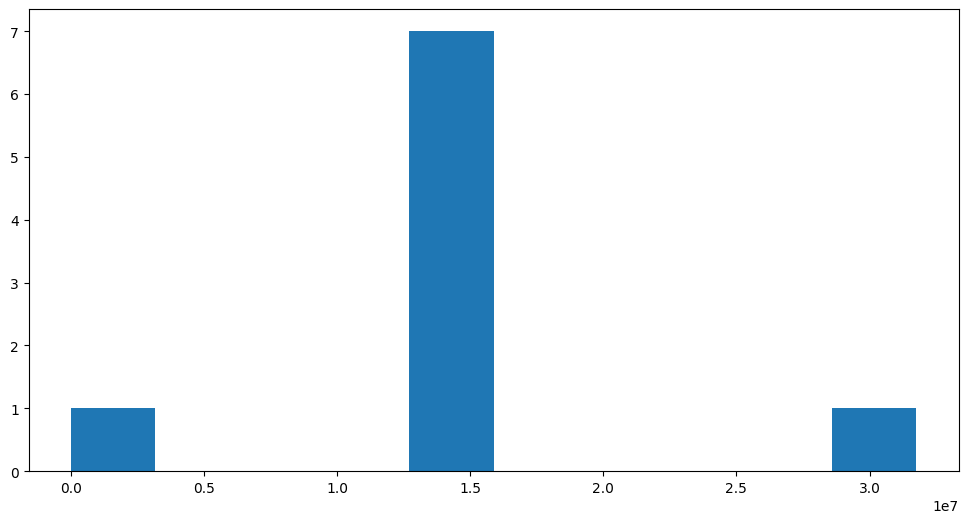

In [54]:
plt.figure(figsize=(12, 6))
plt.hist(data_bank['Aktiva Rupiah'][data_bank['Tipe Komponen'] == 'Bank Pemerintah'])

In [86]:
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import Metadata

In [89]:
metadata = Metadata.detect_from_dataframe(
    data = data_bank[['Aktiva Rupiah']],
    table_name = 'Kelompok Bank'
)

In [90]:
metadata

{
    "tables": {
        "Kelompok Bank": {
            "columns": {
                "Aktiva Rupiah": {
                    "sdtype": "numerical"
                }
            }
        }
    },
    "relationships": [],
    "METADATA_SPEC_VERSION": "V1"
}

In [94]:
data_completed = data_bank[['Aktiva Rupiah']][data_bank['Aktiva Rupiah'] + data_bank['Valuta Asing'] == data_bank['Jumlah Aset']]
data_completed 

,Aktiva Rupiah
4,31758241.0
5,2188719.0
9,1134559.0
12,13772465.0
13,1142001.0
16,13625707.0
17,1149063.0
21,1180373.0
24,13666445.0
25,1185713.0


In [95]:
model = GaussianCopulaSynthesizer(metadata=metadata)
model.fit(data_completed)
synthetic_data = model.sample(num_rows=31)

In [97]:
synthetic_data.sort_values(by='Aktiva Rupiah')

,Aktiva Rupiah
24,1134560.0
29,1145920.0
0,1156892.0
4,1176503.0
12,1182321.0
16,1247260.0
2,1254153.0
19,1283351.0
17,1395398.0
18,1570534.0


In [98]:
data_bank

,Tanggal,Tipe Komponen,Aktiva Rupiah,Valuta Asing,Jumlah Aset
0,2023-01,Bank Pemerintah,NaN,NaN,NaN
1,2023-01,Bank Swasta Nasional,NaN,NaN,NaN
2,2023-01,Bank Asing dan Bank Campuran,NaN,NaN,NaN
3,2023-01,Bank Perkreditan Rakyat,NaN,NaN,NaN
4,2023-02,Bank Pemerintah,31758241.0,5102409.0,36860650.0
5,2023-02,Bank Swasta Nasional,2188719.0,28327.0,2217046.0
6,2023-02,Bank Asing dan Bank Campuran,NaN,NaN,NaN
7,2023-02,Bank Perkreditan Rakyat,42956.0,NaN,42956.0
8,2023-03,Bank Pemerintah,13519088.0,2464703.0,15983792.0
9,2023-03,Bank Swasta Nasional,1134559.0,8988.0,1143547.0


In [57]:
from ctgan import CTGAN

In [ ]:
ctgan = CTGAN(epochs=300)
ctgan.fit(df_complete)